In [2]:
sklearn.__version__

'0.20.2'

In [188]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [189]:
datapath = '~/Dropbox/OZP_Course/OZP_2019/Data/'

In [190]:
churn = pd.read_csv(datapath+'churn.csv')
#churn.dtypes

In [191]:
churn_cat = churn.select_dtypes(include = ['object'])
churn_num = churn.select_dtypes(exclude = ['object'])

In [192]:
type(churn['Churn?'][0])

str

In [193]:
churn_cat.describe()

,State,Phone,Int'l Plan,VMail Plan,Churn?
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,354-8914,no,no,False.
freq,106,1,3010,2411,2850


In [194]:
churn_num.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Application of predictive models 

In [195]:
outcome = churn['Churn?']
class_map = {'True.':1, 'False.':0}
outcome = outcome.map(class_map)

In [196]:
lr = LogisticRegression(solver = 'lbfgs', max_iter=10000)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [197]:
lr.fit(churn_num, outcome)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
predictions = lr.predict(churn_num)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [199]:
lr.predict_proba(churn_num)
# Add mapping to classes here

array([[0.81624144, 0.18375856],
       [0.92027473, 0.07972527],
       [0.90421586, 0.09578414],
       ...,
       [0.73666362, 0.26333638],
       [0.92443219, 0.07556781],
       [0.84819045, 0.15180955]])

## Evaluation of classification models

In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [51]:
accuracy_score(outcome, predictions)

0.8574857485748575

In [52]:
recall_score(outcome, predictions)

0.10144927536231885

In [53]:
precision_score(outcome, predictions)

0.5444444444444444

In [54]:
roc_auc_score(outcome, predictions)

0.5435316552250191

In [204]:
cm = confusion_matrix(outcome, predictions)
cm

array([[2809,   41],
       [ 434,   49]])

In [201]:
tn, fp, fn, tp = confusion_matrix(outcome,predictions).ravel()

In [202]:
print(tn)
print(fp)
print(fn)
print(tp)

2809
41
434
49


In [214]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.98561404 0.01438596]
 [0.89855072 0.10144928]]


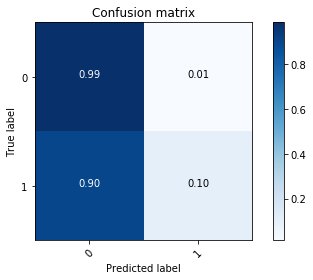

In [219]:
plot_confusion_matrix(cm, [0,1], normalize = True)

## Division on train and test

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
# usual notation for train and test splits is X and y
X = churn_num
y = outcome

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [233]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [234]:
accuracy_score(y_test, y_pred)

0.8590909090909091

In [235]:
roc_auc_score(y_test, y_pred)

0.5415558510638298

In [236]:
precision_score(y_test, y_pred)

0.6

In [237]:
recall_score(y_test, y_pred)

0.09375

Normalized confusion matrix
[[0.9893617 0.0106383]
 [0.90625   0.09375  ]]


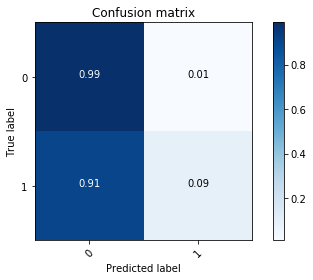

In [238]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, [0,1], normalize=True)

##  Model comparison - Cross Validation

list of standard scores may be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html) 

In [239]:
# cross_val_score does cross validation and returns single score
from sklearn.model_selection import cross_val_score
# cross_validate allows evaluation based on multiple scores
from sklearn.model_selection import cross_validate

In [240]:
#CV score returns performance metric for each fold
cv_score= cross_val_score(lr, X_train, y_train, cv=5, scoring = 'precision')
print('Score by folds: {}'.format(cv_score))
print('Mean of score: {}'.format(cv_score.mean()))

Score by folds: [0.33333333 0.57142857 0.7        0.42857143 0.5       ]
Mean of score: 0.5066666666666666


In [241]:
cv_scores = cross_validate(lr, X_train, y_train, cv=5, scoring = ['precision', 'recall'], return_train_score=True)

In [242]:
cv_scores

{'fit_time': array([0.19441748, 0.21908355, 0.19921279, 0.17696023, 0.19372392]),
 'score_time': array([0.00272322, 0.00280976, 0.0025816 , 0.00262022, 0.00253439]),
 'test_precision': array([0.33333333, 0.57142857, 0.7       , 0.42857143, 0.5       ]),
 'test_recall': array([0.07692308, 0.12307692, 0.10769231, 0.046875  , 0.0625    ]),
 'train_precision': array([0.55      , 0.46153846, 0.48888889, 0.57142857, 0.52272727]),
 'train_recall': array([0.12790698, 0.06976744, 0.08527132, 0.10810811, 0.08880309])}

In [243]:
lr_balanced = LogisticRegression(class_weight='balanced', solver = 'lbfgs', max_iter = 10000)
scores = ['precision', 'recall']
cv_scores = cross_validate(lr_balanced, X_train, y_train, cv=5, scoring = scores, return_train_score=True)

In [244]:
cv_scores

{'fit_time': array([0.36458373, 0.16460609, 0.24501395, 0.23003387, 0.15918541]),
 'score_time': array([0.00269771, 0.00265598, 0.00266719, 0.00265336, 0.00258636]),
 'test_precision': array([0.26760563, 0.28901734, 0.28930818, 0.26973684, 0.27848101]),
 'test_recall': array([0.58461538, 0.76923077, 0.70769231, 0.640625  , 0.6875    ]),
 'train_precision': array([0.28594507, 0.27936508, 0.28683386, 0.29672131, 0.28209192]),
 'train_recall': array([0.68604651, 0.68217054, 0.70930233, 0.6988417 , 0.68725869])}

In [261]:
def score_to_stats(scores):
    '''
    Method for aggregation
    '''
    return {score:round(values.mean(),3) for score, values in scores.items()}
        

In [262]:
score_to_stats(cv_scores)

{'fit_time': 0.228,
 'score_time': 0.003,
 'test_precision': 0.279,
 'test_recall': 0.678,
 'train_precision': 0.286,
 'train_recall': 0.693}

In [263]:
lr.coef_

array([[ 0.00206319,  0.00210063, -0.02306814,  0.00609454,  0.0006567 ,
         0.03193334,  0.01136397,  0.00201181, -0.0604957 ,  0.00345115,
         0.00232438, -0.0315609 ,  0.0915563 , -0.09795243,  0.04223466,
         0.44581383]])

# Feature compression - PCA 

In [248]:
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True)
pca = PCA(n_components = 16)

pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [249]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

In [250]:
pca.components_

array([[ 0.0021834 ,  0.05178924,  0.00050296, -0.9821059 , -0.00285292,
        -0.16695759,  0.0192516 , -0.00873926,  0.00163631,  0.06515184,
        -0.01392452,  0.00293285,  0.00041628, -0.00003432,  0.00011202,
         0.00087011],
       [ 0.06799103,  0.03206267, -0.00057159, -0.0345561 , -0.01869831,
        -0.00587351,  0.64683418, -0.00515618,  0.0549827 , -0.75507725,
         0.00533764, -0.0339791 ,  0.00106731,  0.00070642,  0.0002866 ,
         0.00021497],
       [ 0.0033089 ,  0.06894575,  0.00402467,  0.05981403,  0.00200877,
         0.01016974,  0.75241246, -0.00682589,  0.06395517,  0.64835154,
         0.00774323,  0.02917631, -0.00114575,  0.00034208, -0.00031001,
        -0.00058182],
       [-0.27590867,  0.95733371,  0.00780372,  0.04502842, -0.00822133,
         0.00765436, -0.05859707, -0.01677057, -0.0049779 , -0.03641629,
         0.00991777, -0.00163933,  0.00126448, -0.00169434,  0.00034015,
         0.00071859],
       [ 0.95819761,  0.27345619, -0

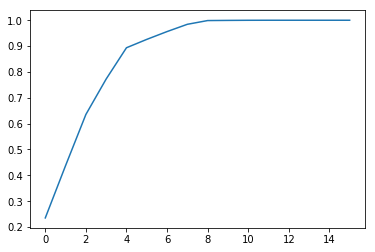

In [251]:
from matplotlib import pyplot as plt
plt.plot(cum_var)
plt.show()

# Experiment with preprocesing 

In [252]:
pca = PCA(n_components = 8)
lr_balanced = LogisticRegression(class_weight='balanced', solver = 'lbfgs', max_iter = 10000)

In [253]:
X_train_pca

array([[ -46.33175288,   23.43991882,  -25.23115764, ...,    0.06017227,
          -6.68010971,    6.32644784],
       [  44.87306453,   17.40460219,   26.87652483, ...,  -19.8408898 ,
          44.77649461,   16.6610701 ],
       [ 100.76568359,   48.08133483,   -7.19163544, ...,   36.11976779,
          11.78491657,    9.42077927],
       ...,
       [  91.63419564,   52.47954177,   27.8830641 , ...,  -33.59669175,
           9.22644753,    9.43930035],
       [   1.04531273,  -34.31821767,   -3.16835709, ...,  -10.34004278,
         -24.09360062,  -14.41411319],
       [ 156.63580075, -142.04362646,   15.38423834, ...,   -3.97968516,
         -27.41593857,    3.93609268]])

In [254]:
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
lr_model = lr_balanced.fit(X_train_pca, y_train)

In [255]:
X_test_pca = pca.transform(X_test)

In [256]:
predictions = lr_model.predict(X_test_pca)

In [257]:
cv_scores = cross_validate(lr_balanced, X_train, y_train, cv=5, scoring = scores, return_train_score=True)

In [258]:
score_to_stats(cv_scores)

{'fit_time': 0.2278879165649414,
 'score_time': 0.002698802947998047,
 'test_precision': 0.27882980114147987,
 'test_recall': 0.6779326923076924,
 'train_precision': 0.28619144738577745,
 'train_recall': 0.6927239531890695}

# Pipelines 

In [148]:
from sklearn.pipeline import Pipeline

(2233, 16)

In [150]:
pipe = Pipeline(steps=[('pca', pca), ('lr_balanced', lr_balanced)])

In [151]:
model = pipe.fit(X_train, y_train)

In [152]:
pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [153]:
# Accessing to model
pipe.named_steps['lr_balanced'].coef_

array([[-0.00663016,  0.00190769,  0.00361878,  0.00212023,  0.00231072,
        -0.00112895, -0.00107785, -0.00030229, -0.01887368, -0.0698423 ]])

In [154]:
cv_scores = cross_validate(pipe, X_train, y_train, scoring = scores, cv = 5, return_train_score=True)
cv_scores

{'fit_time': array([0.05308485, 0.0234015 , 0.02437115, 0.03616095, 0.02507782]),
 'score_time': array([0.00317574, 0.0028553 , 0.00295186, 0.00331283, 0.00290751]),
 'test_precision': array([0.20100503, 0.22513089, 0.18817204, 0.1625    , 0.18333333]),
 'test_recall': array([0.61538462, 0.66153846, 0.53846154, 0.40625   , 0.515625  ]),
 'train_precision': array([0.20958904, 0.20592194, 0.19541779, 0.20438957, 0.21857923]),
 'train_recall': array([0.59302326, 0.59302326, 0.5620155 , 0.57528958, 0.61776062])}

In [155]:
score_to_stats(cv_scores)

{'fit_time': 0.032419252395629886,
 'score_time': 0.003040647506713867,
 'test_precision': 0.19202825830441403,
 'test_recall': 0.547451923076923,
 'train_precision': 0.20677951573495093,
 'train_recall': 0.5882224417108138}

# Evaluating multiple algorithms and parameters 

In [300]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [301]:
lr = LogisticRegression(class_weight='balanced', solver = 'lbfgs', max_iter = 10000)
lr_balanced = LogisticRegression(class_weight='balanced', solver = 'lbfgs', max_iter = 10000)
rf = RandomForestClassifier(n_estimators=500)
nb = GaussianNB()

In [302]:
algs = [('lr', lr), ('lr_balanced', lr_balanced), ('rf', rf), ('nb', nb)]

In [303]:
pipe = Pipeline([('pca', PCA(n_components = 8)), ('lr', nb)])
score = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv = 5)

In [304]:
score

array([0.65320177, 0.69327427, 0.64881192, 0.59366819, 0.64786486])

In [305]:
result_dict = {}
for alg_name, alg_instance in algs:
    pipe = Pipeline([('pca', PCA(n_components = 8)), (alg_name, alg_instance)])
    score = cross_val_score(pipe, X_train, y_train, scoring='roc_auc', cv = 5)
    result_dict.update({alg_name:score.mean()})

In [306]:
result_dict

{'lr': 0.610791255537656,
 'lr_balanced': 0.610791255537656,
 'nb': 0.6473642015706806,
 'rf': 0.6782106448852194}

In [313]:
# Evaluate best model on test set

pipe = Pipeline([('pca', PCA(n_components = 8)), ('rf', rf)])
predictions = pipe.fit(X_train, y_train).predict(X_test)
score = roc_auc_score(y_test, predictions)

Normalized confusion matrix
[[0.87830189 0.12169811]
 [0.225      0.775     ]]


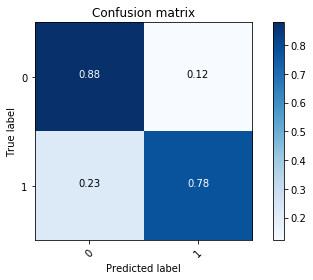

In [316]:
cm = confusion_matrix(predictions, y_test)
plot_confusion_matrix(cm, [0,1], normalize=True)